# History's First Hypothesis Test
Python simulations for a blog article.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
sns.color_palette("hls",24)
# 14,19/20

[(0.86, 0.3712, 0.33999999999999997),
 (0.86, 0.5012, 0.33999999999999997),
 (0.86, 0.6312, 0.33999999999999997),
 (0.86, 0.7612000000000001, 0.33999999999999997),
 (0.8287999999999999, 0.86, 0.33999999999999997),
 (0.6988, 0.86, 0.33999999999999997),
 (0.5688000000000001, 0.86, 0.33999999999999997),
 (0.43879999999999986, 0.86, 0.33999999999999997),
 (0.33999999999999997, 0.86, 0.3712),
 (0.33999999999999997, 0.86, 0.5012000000000001),
 (0.33999999999999997, 0.86, 0.6312),
 (0.33999999999999997, 0.86, 0.7612000000000001),
 (0.33999999999999997, 0.8287999999999999, 0.86),
 (0.33999999999999997, 0.6988, 0.86),
 (0.33999999999999997, 0.5688000000000001, 0.86),
 (0.33999999999999997, 0.43879999999999986, 0.86),
 (0.3712, 0.33999999999999997, 0.86),
 (0.5011999999999995, 0.33999999999999997, 0.86),
 (0.6311999999999998, 0.33999999999999997, 0.86),
 (0.7612000000000001, 0.33999999999999997, 0.86),
 (0.86, 0.33999999999999997, 0.8287999999999999),
 (0.86, 0.33999999999999997, 0.6987999999999996),
 (0.86, 0.33999999999999997, 0.5688000000000001),
 (0.86, 0.33999999999999997, 0.43879999999999986)]

In [17]:
df = pd.read_csv("arbuthnot.csv")

In [31]:
# New columns
df['boys_per_100_girls'] = df['boys']/df['girls']*100

In [32]:
df.head()

,year,boys,girls,boys_per_100_girls
0,1629,5218,4683,111.424301
1,1630,4858,4457,108.997083
2,1631,4422,4102,107.801073
3,1632,4994,4590,108.801743
4,1633,5158,4839,106.592271


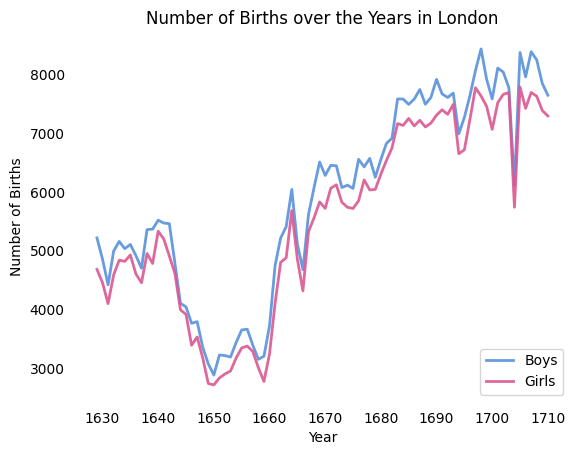

In [74]:
fig, ax = plt.subplots()
ax.plot(df['year'], df['boys'], linewidth=2, color=sns.color_palette("hls",24)[14], alpha=.9)
ax.plot(df['year'], df['girls'], linewidth=2, color=sns.color_palette("hls",24)[22], alpha=.9)
plt.title('Number of Births over the Years in London')
plt.xlabel('Year')
plt.ylabel('Number of Births')
plt.legend(labels=['Boys', 'Girls'], loc='lower right')
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none') 

plt.savefig('births-over-years.png')

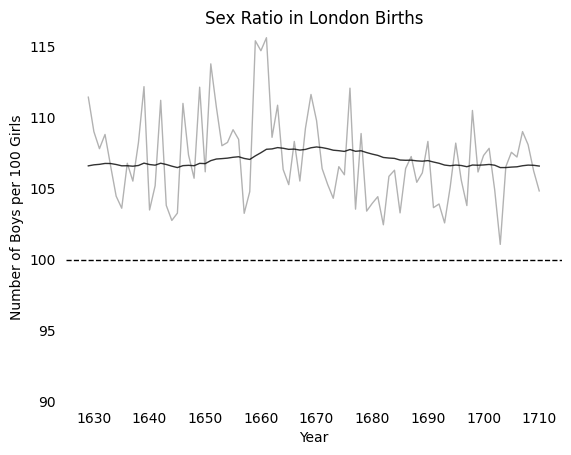

In [76]:
alpha = 0.03  # Smoothing factor (0 < alpha < 1)
moving_avg = [df['boys_per_100_girls'][4]]
for i in range(1, len(df['boys_per_100_girls'])):
    moving_avg.append(alpha * df['boys_per_100_girls'][i] + (1 - alpha) * moving_avg[-1])

fig, ax = plt.subplots()
ax.plot(df['year'], df['boys_per_100_girls'], linewidth=1, color='k', alpha=.3)
ax.plot(df['year'], moving_avg, linewidth=1, color='k', alpha=.8)
plt.axhline(y = 100, color = 'k',  linewidth=1, linestyle = '--')
plt.title('Sex Ratio in London Births')
plt.xlabel('Year')
plt.ylabel('Number of Boys per 100 Girls')
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none') 
ax.set_ylim([90,116])

plt.savefig('sex-ratio-over-years.png')